# LEIR Electron Cooling Effects

This notebook explores the impact of electron cooling in LEIR on the final bunch intensities. Electron cooling is a critical process in LEIR that allows for higher beam intensities by reducing the beam emittance (before RF capture) and enabling more injections.

## Background

Electron cooling in LEIR:
- Reduces transverse and longitudinal emittances
- Allows for multiple consecutive injections
- Cooling time depends on ion species (longer for lighter ions)
- Including this effect can reduce the final beam intensity

Let's compare scenarios with and without electron cooling:

In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from pathlib import Path
import sys

# Add the parent directory to Python path to import injector_model
sys.path.append(str(Path.cwd().parent))
from injector_model import InjectorChain

# Set up matplotlib for nice plots
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 1. Create Two InjectorChain Instances

We'll create two identical setups, differing only in electron cooling:

In [18]:
# Scenario 1: WITHOUT electron cooling
injector_no_ecool = InjectorChain(
    LEIR_bunches=2,
    PS_splitting=2,
    LEIR_PS_strip=False,
    account_for_LEIR_ecooling=False,  # No electron cooling
    account_for_PS_rest_gas=True
)

# Scenario 2: WITH electron cooling
injector_with_ecool = InjectorChain(
    LEIR_bunches=2,
    PS_splitting=2,
    LEIR_PS_strip=False,
    account_for_LEIR_ecooling=True,   # With electron cooling
    account_for_PS_rest_gas=True
)

print("✓ Created two InjectorChain instances:")
print(f"  1. Without electron cooling")
print(f"  2. With electron cooling")

Initiated ion type: Pb
Q_LEIR = 54.0, Q_PS = 54.0, Q_SPS = 82.0 (fully stripped)
Strip LEIR-PS: False
Initiated ion type: Pb
Q_LEIR = 54.0, Q_PS = 54.0, Q_SPS = 82.0 (fully stripped)
Strip LEIR-PS: False
E-cooling time w.r.t to Pb: 1.000

✓ Created two InjectorChain instances:
  1. Without electron cooling
  2. With electron cooling


## 2. Calculate Intensities for All Ion Species

Let's calculate the bunch intensities for both scenarios:

In [19]:
# Calculate intensities without electron cooling
print("Calculating intensities without electron cooling...")
df_no_ecool = injector_no_ecool.calculate_LHC_bunch_intensity_all_ion_species(save_csv=False)

# Calculate intensities with electron cooling
print("Calculating intensities with electron cooling...")
df_with_ecool = injector_with_ecool.calculate_LHC_bunch_intensity_all_ion_species(save_csv=False)

print(f"✓ Calculations completed for {len(df_no_ecool)} ion species")

# Display the ion species
print("\nIon species analyzed:")
for i, ion in enumerate(df_no_ecool.index, 1):
    print(f"  {i}. {ion}")

Calculating intensities without electron cooling...
Initiated ion type: He
Q_LEIR = 1.0, Q_PS = 1.0, Q_SPS = 2.0 (fully stripped)
Strip LEIR-PS: False
Ion type: He with Q_PS = 1.0
Account for rest gas in PS transmission: True, assume transmission = 0.7639097491244964 for cycle length: 1.2 s
SPS gamma0: 7.33600
Initiated ion type: O
Q_LEIR = 4.0, Q_PS = 4.0, Q_SPS = 8.0 (fully stripped)
Strip LEIR-PS: False
Ion type: O with Q_PS = 4.0
Account for rest gas in PS transmission: True, assume transmission = 0.7269397232357733 for cycle length: 1.2 s
SPS gamma0: 7.33600
Initiated ion type: Mg
Q_LEIR = 7.0, Q_PS = 7.0, Q_SPS = 12.0 (fully stripped)
Strip LEIR-PS: False
Ion type: Mg with Q_PS = 7.0
Account for rest gas in PS transmission: True, assume transmission = 0.8231856075975958 for cycle length: 1.2 s
SPS gamma0: 7.33600
Initiated ion type: Ar
Q_LEIR = 11.0, Q_PS = 11.0, Q_SPS = 18.0 (fully stripped)
Strip LEIR-PS: False
Ion type: Ar with Q_PS = 11.0
Account for rest gas in PS transmissi

## 3. Compare the Results

Let's create a comparison showing the improvement factor with electron cooling:

In [20]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Ion': df_no_ecool.index,
    'Mass_Number': df_no_ecool['massNumber'],
    'Atomic_Number': df_no_ecool['atomicNumber'],
    'LEIR_Injections_No_Ecool': df_no_ecool['LEIR_numberofPulses'],
    'LEIR_Injections_With_Ecool': df_with_ecool['LEIR_numberofPulses'],
    'LHC_Ions_No_Ecool': df_no_ecool['LHC_ionsPerBunch'],
    'LHC_Ions_With_Ecool': df_with_ecool['LHC_ionsPerBunch'],
    'LHC_Charges_No_Ecool': df_no_ecool['LHC_chargesPerBunch'],
    'LHC_Charges_With_Ecool': df_with_ecool['LHC_chargesPerBunch']
})

# Calculate improvement factors
comparison_df['Injection_Factor'] = (
    comparison_df['LEIR_Injections_With_Ecool'] / 
    comparison_df['LEIR_Injections_No_Ecool']
)
comparison_df['Ion_Improvement_Factor'] = (
    comparison_df['LHC_Ions_With_Ecool'] / 
    comparison_df['LHC_Ions_No_Ecool']
)
comparison_df['Charge_Improvement_Factor'] = (
    comparison_df['LHC_Charges_With_Ecool'] / 
    comparison_df['LHC_Charges_No_Ecool']
)

# Display summary
print("Electron Cooling Impact Summary:")
print("=" * 60)
print(f"{'Ion':<8} {'A':<4} {'Z':<4} {'Inj Factor':<12} {'Ion Factor':<12} {'Charge Factor':<12}")
print("-" * 60)
for _, row in comparison_df.iterrows():
    print(f"{row['Ion']:<8} {row['Mass_Number']:<4.0f} {row['Atomic_Number']:<4.0f} "
          f"{row['Injection_Factor']:<12.1f} {row['Ion_Improvement_Factor']:<12.1f} "
          f"{row['Charge_Improvement_Factor']:<12.1f}")

Electron Cooling Impact Summary:
Ion      A    Z    Inj Factor   Ion Factor   Charge Factor
------------------------------------------------------------
He       4    2    0.1          1.0          1.0         
O        16   8    0.1          0.9          0.9         
Mg       24   12   0.1          0.2          0.2         
Ar       40   18   0.1          0.4          0.4         
Ca       40   20   0.5          1.0          1.0         
Kr       86   36   0.4          1.0          1.0         
In       115  49   0.9          1.0          1.0         
Xe       129  54   0.8          1.0          1.0         
Pb       208  82   1.0          1.0          1.0         


## 4. Visualize the Electron Cooling Benefits

Let's create comprehensive plots showing the impact of electron cooling:

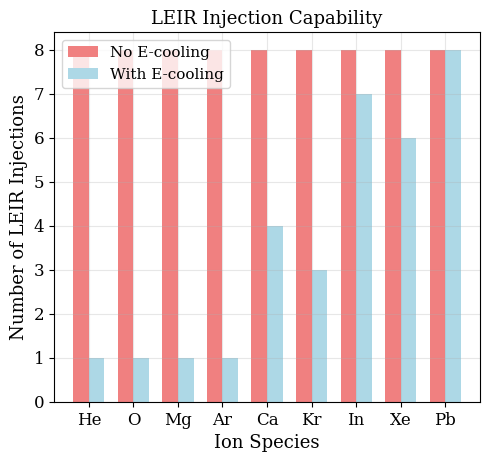

In [29]:
# Plot 1: Number of LEIR injections
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 4.8))

x_pos = np.arange(len(comparison_df))
width = 0.35
ions = comparison_df['Ion']

ax1.bar(x_pos - width/2, comparison_df['LEIR_Injections_No_Ecool'], width, 
        label='No E-cooling', color='lightcoral')
ax1.bar(x_pos + width/2, comparison_df['LEIR_Injections_With_Ecool'], width,
        label='With E-cooling', color='lightblue')
ax1.set_xlabel('Ion Species')
ax1.set_ylabel('Number of LEIR Injections')
ax1.set_title('LEIR Injection Capability')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(ions)
ax1.legend()
ax1.grid(True, alpha=0.3)

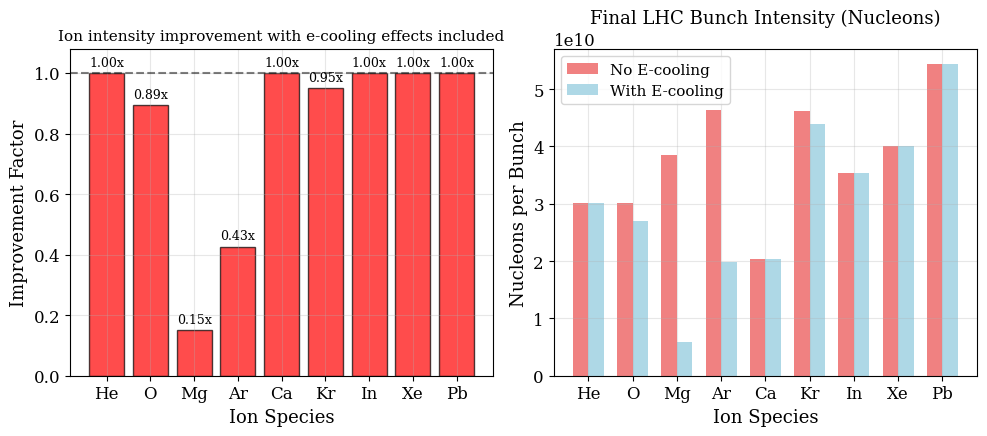


📊 The plots show the dramatic impact of electron cooling on beam intensity!


In [34]:
# Plot 3: Improvement factors for ions
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(10, 4.5))

colors = ['red' if x < 1.5 else 'orange' if x < 3 else 'green' 
          for x in comparison_df['Ion_Improvement_Factor']]
bars3 = ax3.bar(x_pos, comparison_df['Ion_Improvement_Factor'], 
                color=colors, alpha=0.7, edgecolor='black')
ax3.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='No improvement')
ax3.set_xlabel('Ion Species')
ax3.set_ylabel('Improvement Factor')
ax3.set_title('Ion intensity improvement with e-cooling effects included', fontsize=11)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(ions)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, comparison_df['Ion_Improvement_Factor'].max() * 1.08)

# Add value labels on bars
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax3.annotate(f'{height:.2f}x',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Plot 4: Nucleons per bunch comparison
nucleons_no_ecool = comparison_df['LHC_Ions_No_Ecool'] * comparison_df['Mass_Number']
nucleons_with_ecool = comparison_df['LHC_Ions_With_Ecool'] * comparison_df['Mass_Number']

ax4.bar(x_pos - width/2, nucleons_no_ecool, width,
        label='No E-cooling', color='lightcoral', alpha=0.99)
ax4.bar(x_pos + width/2, nucleons_with_ecool, width,
        label='With E-cooling', color='lightblue', alpha=0.99)
ax4.set_xlabel('Ion Species')
ax4.set_ylabel('Nucleons per Bunch')
ax4.set_title('Final LHC Bunch Intensity (Nucleons)')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(ions)
ax4.legend()
#ax4.set_yscale('log')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 The plots show the dramatic impact of electron cooling on beam intensity!")

## 5. Detailed Analysis of Electron Cooling Effects

Let's analyze why electron cooling has different impacts on different ion species:

In [36]:
# Analyze the physics behind the improvements
print("Detailed Analysis of Electron Cooling Effects:")
print("=" * 50)

for _, row in comparison_df.iterrows():
    ion = row['Ion']
    A = row['Mass_Number']
    Z = row['Atomic_Number']
    
    print(f"\n{ion} (A={A:.0f}, Z={Z:.0f}):")
    print(f"  LEIR injections: {row['LEIR_Injections_No_Ecool']:.0f} → "
          f"{row['LEIR_Injections_With_Ecool']:.0f} "
          f"Change factor: ({row['Injection_Factor']:.1f}x increase)")
    
    print(f"  LHC ions/bunch: {row['LHC_Ions_No_Ecool']:.2e} → "
          f"{row['LHC_Ions_With_Ecool']:.2e} "
          f"({row['Ion_Improvement_Factor']:.1f}x increase)")
    
    # Calculate nucleons per bunch
    nucleons_no = row['LHC_Ions_No_Ecool'] * A
    nucleons_with = row['LHC_Ions_With_Ecool'] * A
    nucleon_factor = nucleons_with / nucleons_no
    
    print(f"  Nucleons/bunch: {nucleons_no:.2e} → {nucleons_with:.2e} "
          f"({nucleon_factor:.1f}x increase)")
    
    # Categorize the improvement
    if row['Ion_Improvement_Factor'] > 5:
        category = "🔥 HUGE benefit"
    elif row['Ion_Improvement_Factor'] > 2:
        category = "⚡ Significant benefit"
    elif row['Ion_Improvement_Factor'] > 1.2:
        category = "✓ Moderate benefit"
    else:
        category = "➖ Minimal benefit"
    
    print(f"  Impact: {category}")

Detailed Analysis of Electron Cooling Effects:

He (A=4, Z=2):
  LEIR injections: 8 → 1 Change factor: (0.1x increase)
  LHC ions/bunch: 7.54e+09 → 7.54e+09 (1.0x increase)
  Nucleons/bunch: 3.01e+10 → 3.01e+10 (1.0x increase)
  Impact: ➖ Minimal benefit

O (A=16, Z=8):
  LEIR injections: 8 → 1 Change factor: (0.1x increase)
  LHC ions/bunch: 1.89e+09 → 1.68e+09 (0.9x increase)
  Nucleons/bunch: 3.02e+10 → 2.70e+10 (0.9x increase)
  Impact: ➖ Minimal benefit

Mg (A=24, Z=12):
  LEIR injections: 8 → 1 Change factor: (0.1x increase)
  LHC ions/bunch: 1.61e+09 → 2.42e+08 (0.2x increase)
  Nucleons/bunch: 3.86e+10 → 5.82e+09 (0.2x increase)
  Impact: ➖ Minimal benefit

Ar (A=40, Z=18):
  LEIR injections: 8 → 1 Change factor: (0.1x increase)
  LHC ions/bunch: 1.16e+09 → 4.95e+08 (0.4x increase)
  Nucleons/bunch: 4.64e+10 → 1.98e+10 (0.4x increase)
  Impact: ➖ Minimal benefit

Ca (A=40, Z=20):
  LEIR injections: 8 → 4 Change factor: (0.5x increase)
  LHC ions/bunch: 5.07e+08 → 5.07e+08 (1.0x

## 6. Create a Summary Table

Let's create a nicely formatted table for publication or presentation:

In [42]:
# Create a publication-ready summary table
summary_table = pd.DataFrame({
    'Ion Species': comparison_df['Ion'],
    'Mass (A)': comparison_df['Mass_Number'].astype(int),
    'Charge (Z)': comparison_df['Atomic_Number'].astype(int),
    'LEIR Inj. (no e-cool)': comparison_df['LEIR_Injections_No_Ecool'].astype(int),
    'LEIR Inj. (with e-cool)': comparison_df['LEIR_Injections_With_Ecool'].astype(int),
    'LHC Intensity Gain': comparison_df['Ion_Improvement_Factor'].round(1),
    'Nucleons/bunch (no e-cool)': (comparison_df['LHC_Ions_No_Ecool'] * 
                                   comparison_df['Mass_Number']).apply(lambda x: f'{x:.2e}'),
    'Nucleons/bunch (with e-cool)': (comparison_df['LHC_Ions_With_Ecool'] * 
                                     comparison_df['Mass_Number']).apply(lambda x: f'{x:.2e}')
})

print("Summary Table: Electron Cooling Impact")
print("=" * 100)
print(summary_table.to_string(index=False))

Summary Table: Electron Cooling Impact
Ion Species  Mass (A)  Charge (Z)  LEIR Inj. (no e-cool)  LEIR Inj. (with e-cool)  LHC Intensity Gain Nucleons/bunch (no e-cool) Nucleons/bunch (with e-cool)
         He         4           2                      8                        1                 1.0                   3.01e+10                     3.01e+10
          O        16           8                      8                        1                 0.9                   3.02e+10                     2.70e+10
         Mg        24          12                      8                        1                 0.2                   3.86e+10                     5.82e+09
         Ar        40          18                      8                        1                 0.4                   4.64e+10                     1.98e+10
         Ca        40          20                      8                        4                 1.0                   2.03e+10                     2.03e+10
         Kr  

## 6.5. Comparison with Reference Values

Let's create a comparison bar chart in the style used in calculation scripts:

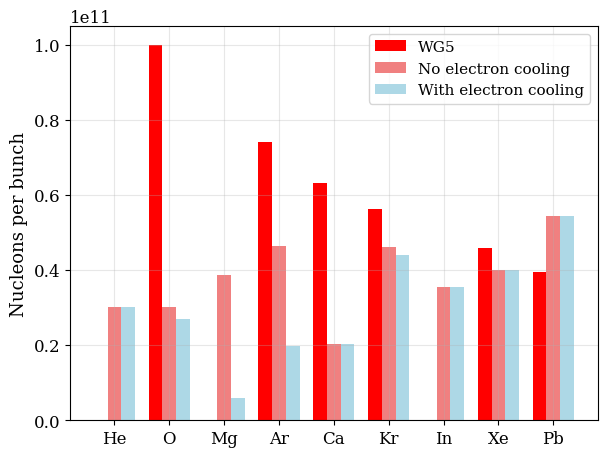

Comparison plot shows nucleons per bunch with and without electron cooling
Red: WG5 reference values
Light coral: No electron cooling
Light blue: With electron cooling


In [45]:
# Load reference data for comparison
data_folder = Path.cwd().parent / 'data'
ref_Table_SPS = pd.read_csv(data_folder / 'test_and_benchmark_data' / 'SPS_final_intensities_WG5_and_Hannes.csv', index_col=0)

# Set up plotting parameters to match calculation script style
SMALL_SIZE = 11
MEDIUM_SIZE = 12
BIGGER_SIZE = 13
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)

# Define bar width for bar plot
bar_width = 0.25
x = np.arange(len(ions))

# Create comparison plot: Nucleons per bunch with/without electron cooling
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
bar1 = ax.bar(x - bar_width, ref_Table_SPS['WG5 Intensity']*df_no_ecool['massNumber'], 
              bar_width, color='red', label='WG5')
bar2 = ax.bar(x, df_no_ecool['LHC_ionsPerBunch']*df_no_ecool['massNumber'], 
              bar_width, color='lightcoral', label='No electron cooling')
bar3 = ax.bar(x + bar_width, df_with_ecool['LHC_ionsPerBunch']*df_with_ecool['massNumber'], 
              bar_width, color='lightblue', label='With electron cooling')
ax.set_xticks(x)
ax.set_xticklabels(ions)
ax.set_ylabel("Nucleons per bunch")
ax.legend()
ax.grid(True, alpha=0.3)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

print("Comparison plot shows nucleons per bunch with and without electron cooling")
print("Red: WG5 reference values")
print("Light coral: No electron cooling")
print("Light blue: With electron cooling")

## Summary

This notebook demonstrated the crucial role of electron cooling in LEIR for ion beam production, where lighter charge states with lower charge take longer to cool, allowed fewer Linac3 injetions. This difference between including the LEIR e-cooler effect does not affect In, Xe, and Pb, but clearly reduce Mg performance and to some extent O and Kr.
